# House Price Prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Understand the data


df = pd.read_csv('/content/Housing.csv')
df.head()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
print(df.tail())
print(df.shape)
print(df.info())


       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
540  1820000  3000         2          1        1      yes        no      yes   
541  1767150  2400         3          1        1       no        no       no   
542  1750000  3620         2          1        1      yes        no       no   
543  1750000  2910         3          1        1       no        no       no   
544  1750000  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
540              no              no        2       no      unfurnished  
541              no              no        0       no   semi-furnished  
542              no              no        0       no      unfurnished  
543              no              no        0       no        furnished  
544              no              no        0       no      unfurnished  
(545, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544

In [ ]:
# statistical info
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
# to check duplicate
df.duplicated().sum()

np.int64(0)

In [ ]:
# distribution of  all categorical col
for col in df.select_dtypes(include='object'):
  print(col)
  print(df[col].value_counts())
  print()


mainroad
mainroad
yes    468
no      77
Name: count, dtype: int64

guestroom
guestroom
no     448
yes     97
Name: count, dtype: int64

basement
basement
no     354
yes    191
Name: count, dtype: int64

hotwaterheating
hotwaterheating
no     520
yes     25
Name: count, dtype: int64

airconditioning
airconditioning
no     373
yes    172
Name: count, dtype: int64

prefarea
prefarea
no     417
yes    128
Name: count, dtype: int64

furnishingstatus
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64



# Target variable analysis

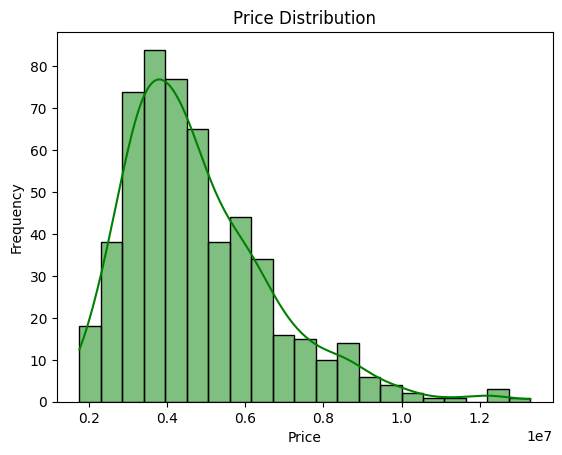

In [ ]:
# chk price in visualization
sns.histplot(df['price'], color='g', kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# DATA CLEANING AND PRE-PROCESSING

In [ ]:
# create a copy of orginal data frame
df_copy = df.copy()

In [ ]:
# check for duplicates
df_copy.duplicated().sum()


np.int64(0)

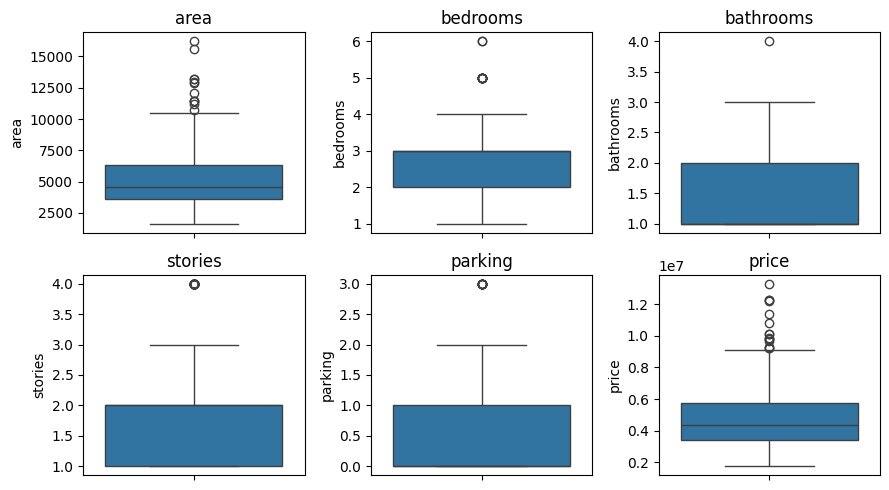

In [ ]:
# to check the outliers of numerical columns

plt.figure(figsize=(9,5))
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
for i, col in enumerate(numerical_cols):
  plt.subplot(2,3,i+1)
  sns.boxplot(y=df_copy[col])
  plt.title(col)
  plt.tight_layout()
plt.show()

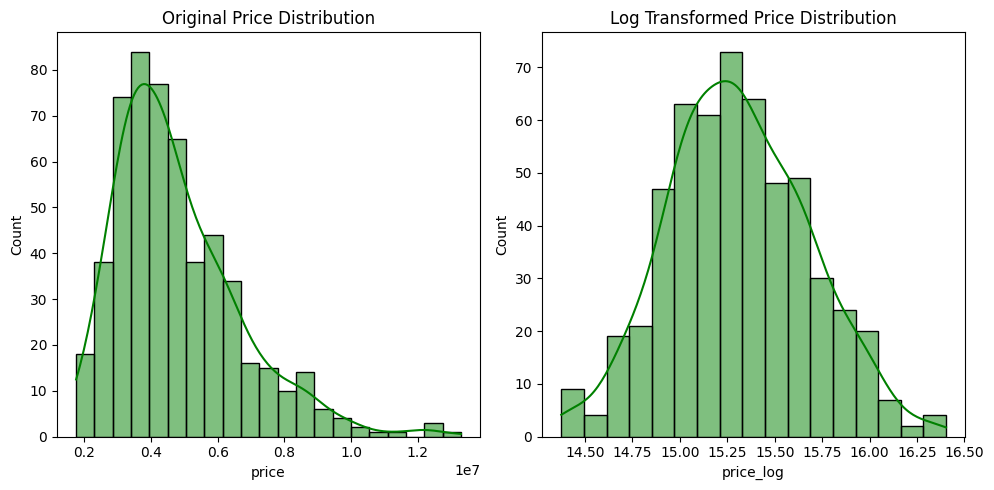

In [ ]:

# log transform the target variable
df_log = df_copy.copy()
df_log['price_log'] = np.log(df_log['price'])

# Show the effects of log transformation
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['price'], color='g', kde=True)
plt.title('Original Price Distribution')


plt.subplot(1,2,2)
sns.histplot(df_log['price_log'], color='g', kde=True)
plt.title('Log Transformed Price Distribution')
plt.tight_layout()
plt.show()

# categorical encoding


In [ ]:
# 1. Convert binary categorical variables to 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df_log[col] = df_log[col].map({'yes': 1, 'no': 0, 'Yes': 1, 'No': 0})

print(df_log[binary_cols].head())

   mainroad  guestroom  basement  hotwaterheating  airconditioning  prefarea
0         1          0         0                0                1         1
1         1          0         0                0                1         0
2         1          0         1                0                0         1
3         1          0         1                0                1         1
4         1          1         1                0                1         0


In [ ]:
# Handle furnishing status with one-hot encoding
# Apply one-hot encoding
df_log = pd.get_dummies(df_log, columns=['furnishingstatus'], drop_first=True)

# Convert boolean columns to integers (0/1)
boolean_cols = ['furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']
for col in boolean_cols:
    df_log[col] = df_log[col].astype(int)

In [ ]:
df_log.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price_log,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,16.403275,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,16.321036,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,16.321036,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,16.318175,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,16.250001,0,0


#scaling

In [ ]:
# Feature scaling for numerical variables
from sklearn.preprocessing import StandardScaler

num_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# StandardScalee
scaler = StandardScaler()
df_log_std = df_log.copy()
df_log_std[num_features] = scaler.fit_transform(df_log[num_features])

In [ ]:
df_log_std[num_features].head()

,area,bedrooms,bathrooms,stories,parking
0,1.046726,1.403419,1.421812,1.378217,1.517692
1,1.757010,1.403419,5.405809,2.532024,2.679409
2,2.218232,0.047278,1.421812,0.224410,1.517692
3,1.083624,1.403419,1.421812,0.224410,2.679409
4,1.046726,1.403419,-0.570187,0.224410,1.517692


In [ ]:
df_log_std.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price_log,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,16.403275,0,0
1,12250000,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,16.321036,0,0
2,12250000,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,16.321036,1,0
3,12215000,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,16.318175,0,0
4,11410000,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,16.250001,0,0


#EDA

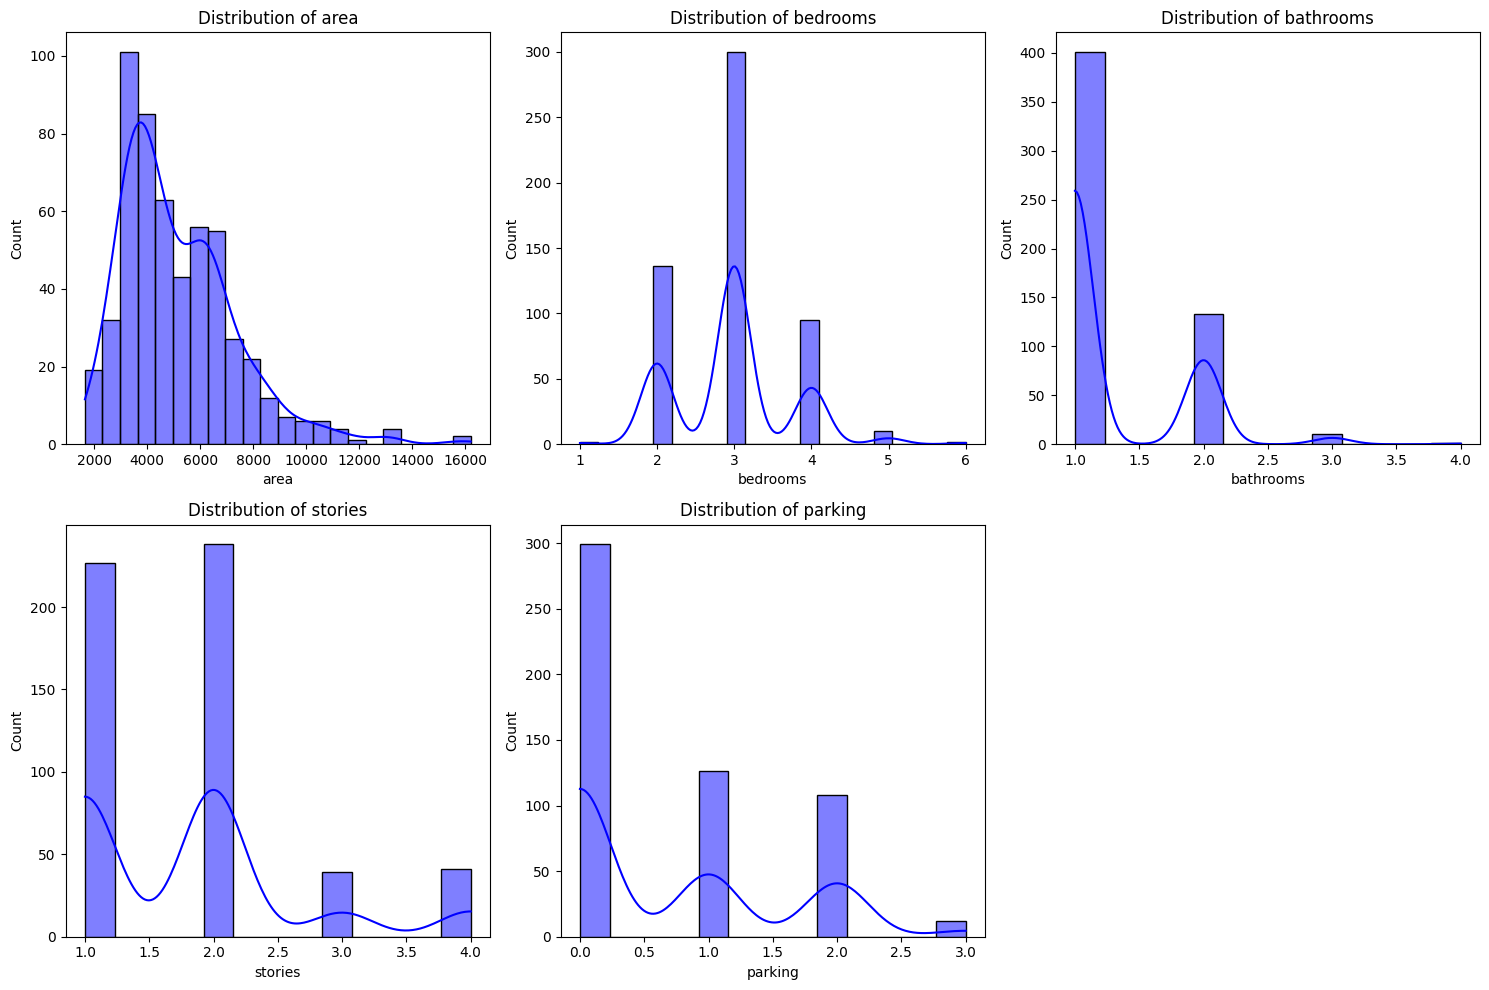

In [ ]:
# univariate analysis(numerical)

num_col = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_col):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_log[col], kde=True, color='b')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

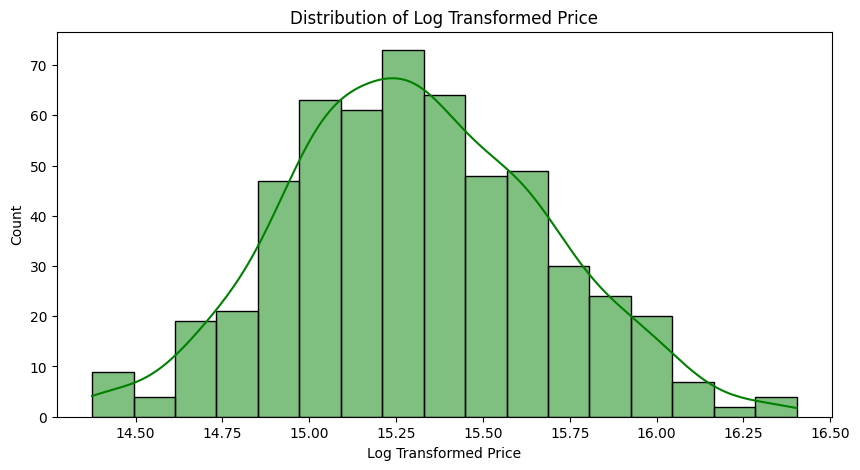

In [ ]:
# log price plot
plt.figure(figsize=(10, 5))
sns.histplot(df_log['price_log'], kde=True, color='g')
plt.title('Distribution of Log Transformed Price')
plt.xlabel('Log Transformed Price')

plt.show()



/tmp/ipython-input-452948135.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_log, x=col, palette='Set2')
/tmp/ipython-input-452948135.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_log, x=col, palette='Set2')
/tmp/ipython-input-452948135.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_log, x=col, palette='Set2')
/tmp/ipython-input-452948135.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=F

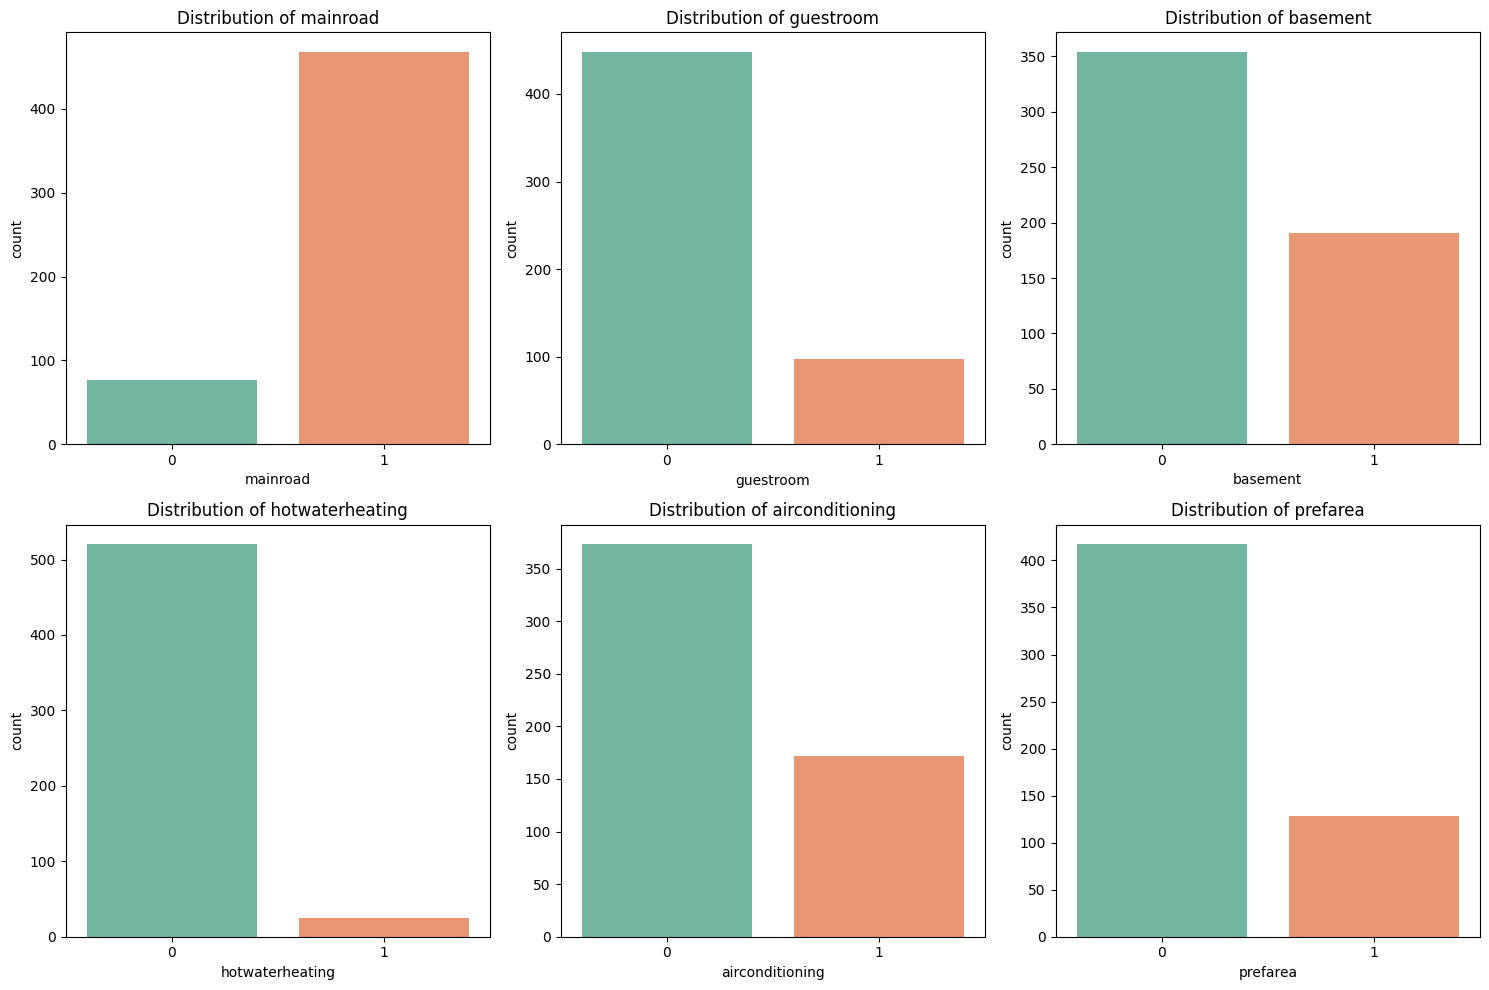

In [ ]:
# categorical col plot

cat_col = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

plt.figure(figsize=(15, 10))

for i, col in enumerate(cat_col):
  plt.subplot(2, 3, i + 1)
  sns.countplot(data=df_log, x=col, palette='Set2')
  plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

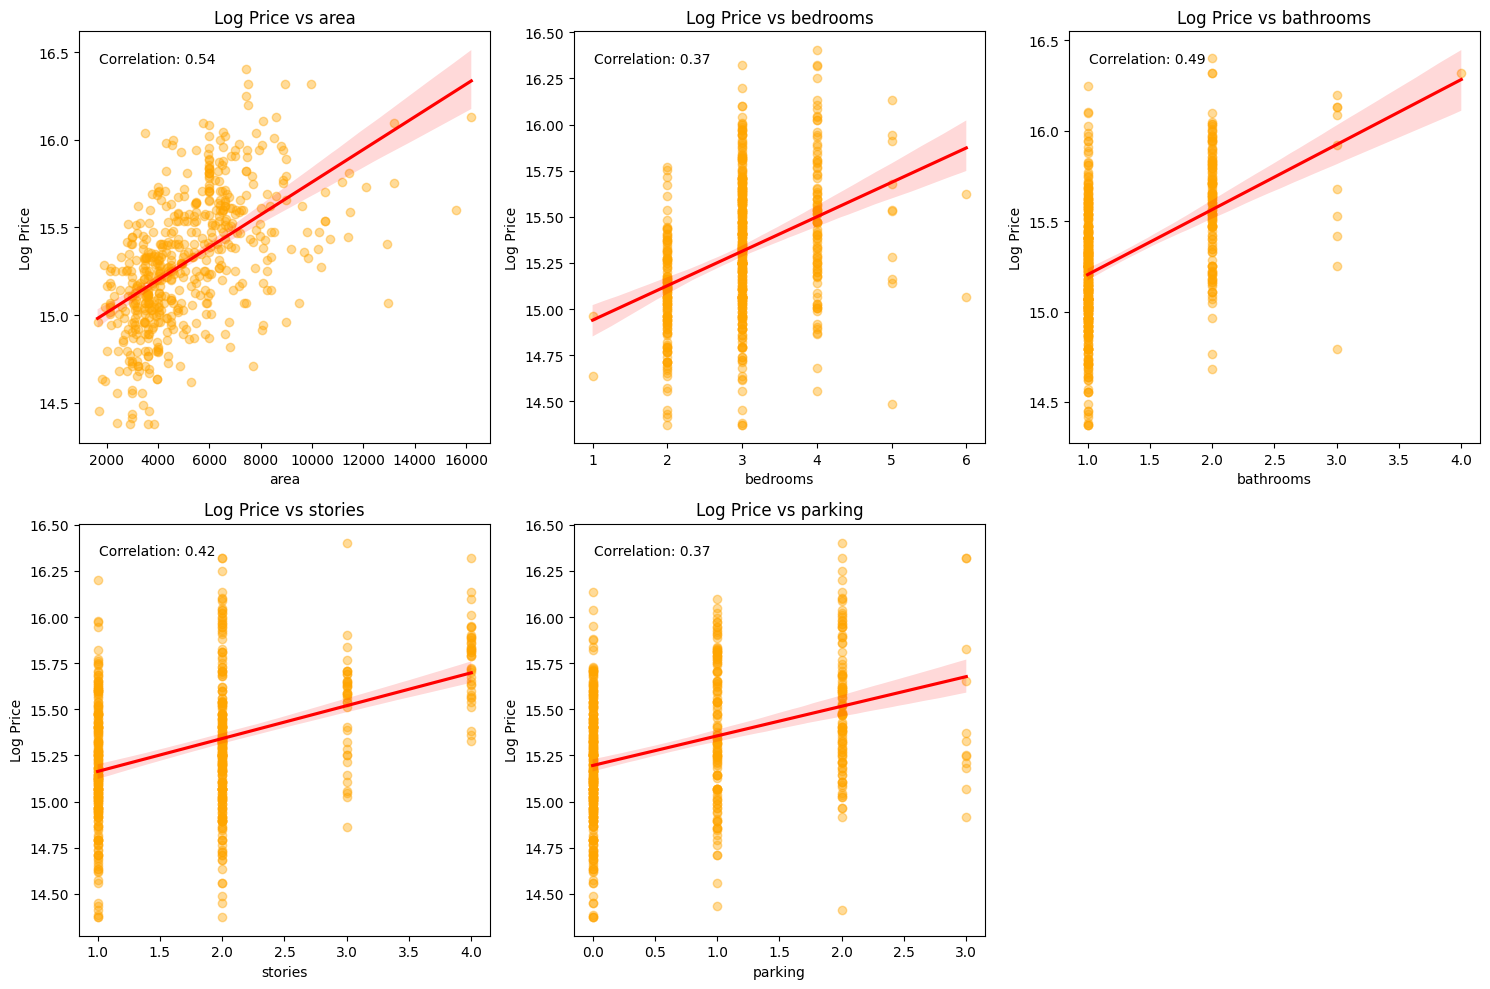

In [ ]:
# bivariate analysis
# relationship between numerical col and log price

plt.figure(figsize=(15,10))
for i, col in enumerate(num_col):
  plt.subplot(2,3,i+1)
  sns.regplot(x = col, y = 'price_log', data=df_log, color='orange', scatter_kws= {'alpha':0.4}, line_kws={'color':'red'})
  plt.title(f'Log Price vs {col}')
  plt.xlabel(col)
  plt.ylabel('Log Price')
  # calculate and display correlation
  corr = df_log[col].corr(df_log['price_log'])
  plt.text(0.05, 0.95, f'Correlation: {corr:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
  plt.tight_layout()
plt.show()

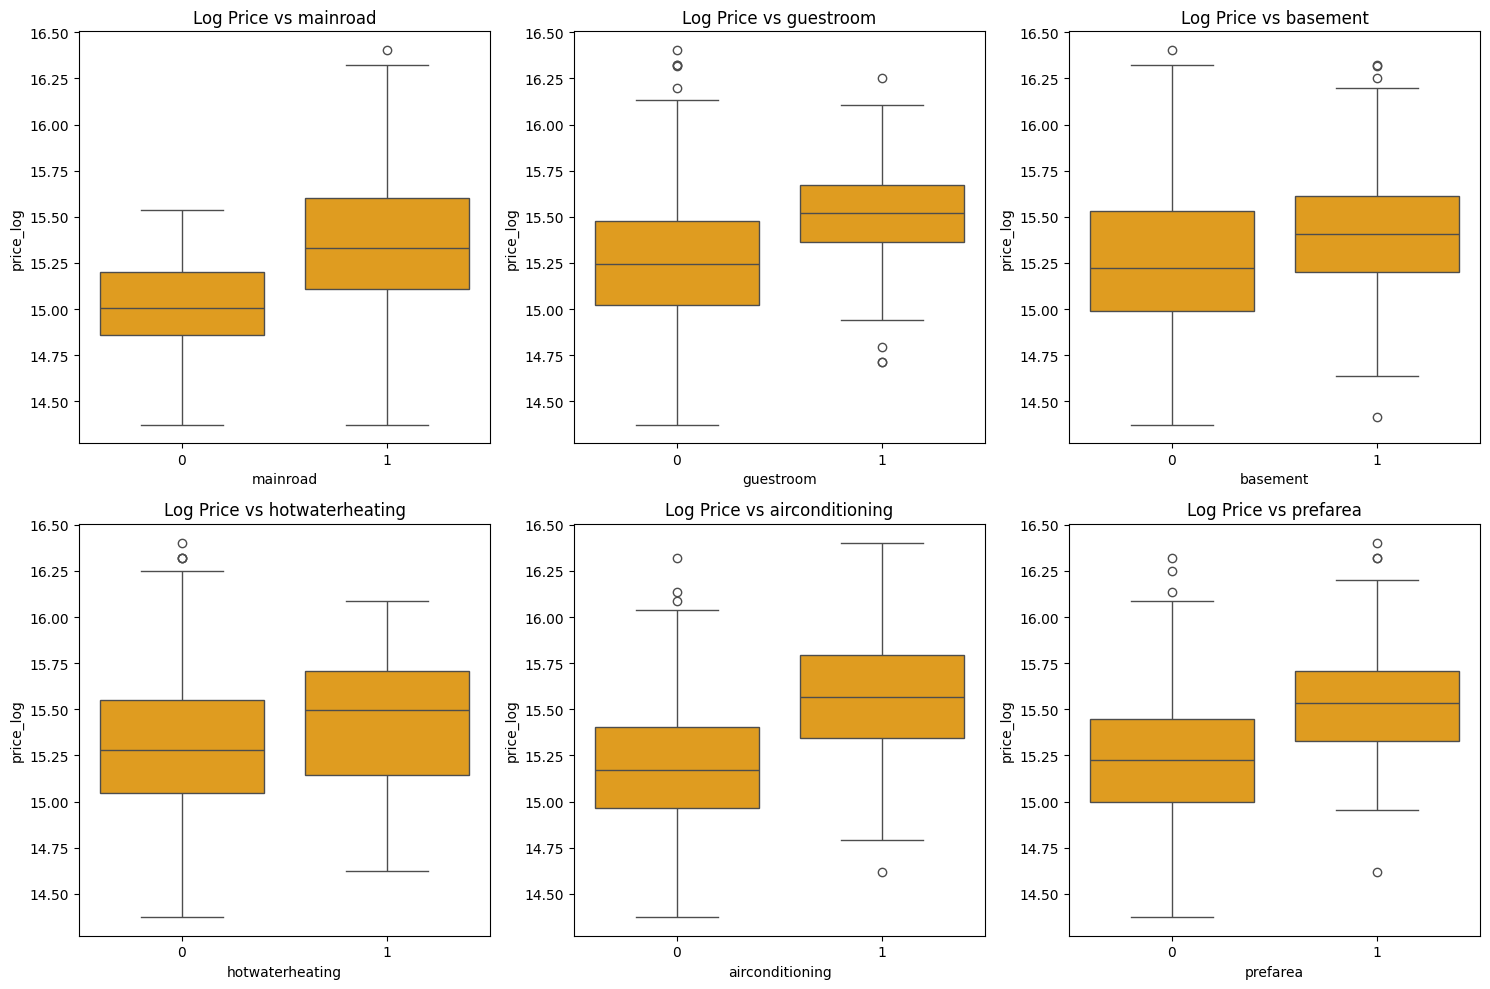

In [ ]:
# relationship between categorical col and log price

plt.figure(figsize=(15,10))
for i, col in enumerate(cat_col):
  plt.subplot(2,3,i+1)
  sns.boxplot(x = col, y = 'price_log', data=df_log, color='orange')
  plt.title(f'Log Price vs {col}')
  plt.tight_layout()
plt.show()

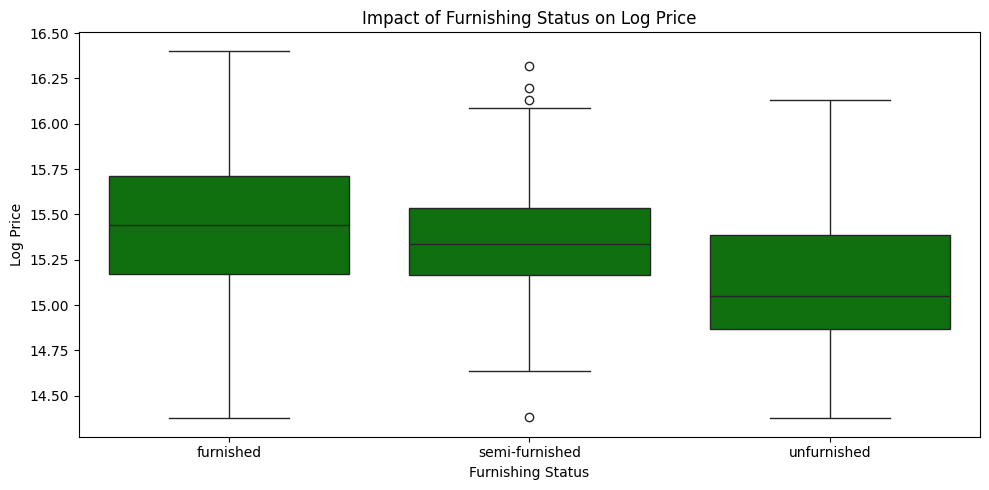

In [ ]:
# furnishing status vs logprice

plt.figure(figsize=(10, 5))
furnishing_data = df_log.copy()
furnishing_data['furnishing_status'] = 'furnished'
furnishing_data.loc[furnishing_data['furnishingstatus_semi-furnished'] == 1, 'furnishing_status'] = 'semi-furnished'
furnishing_data.loc[furnishing_data['furnishingstatus_unfurnished'] == 1, 'furnishing_status'] = 'unfurnished'

sns.boxplot(x='furnishing_status', y='price_log', data=furnishing_data, color='g')
plt.xlabel('Furnishing Status')
plt.title('Impact of Furnishing Status on Log Price')
plt.ylabel('Log Price')
plt.tight_layout()
plt.show()



# data preparation

In [ ]:
df_log_std.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'price_log', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

target = 'price_log'
x = df_log_std.drop(target, axis=1)
y = df_log_std[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [ ]:
# buil the model

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

# prediction

In [ ]:
# predicting target values

y_pred = lr_model.predict(x_test)


In [ ]:
# evalution

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


# Display the results
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.9340
MAE: 0.0775
MSE: 0.0127
RMSE: 0.1129
